In [1]:
source('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/scripts/libraries_analysis.R')
#source('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/scripts/libraries_visuals.R')
source('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/scripts/R_functions/cdr3-QTL_functions.R')
source('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/scripts/R_functions//hla_functions.R')
source('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/scripts/R_functions/cdr3_functions.R')



Attache Paket: ‘dplyr’


Die folgenden Objekte sind maskiert von ‘package:data.table’:

    between, first, last


Die folgenden Objekte sind maskiert von ‘package:stats’:

    filter, lag


Die folgenden Objekte sind maskiert von ‘package:base’:

    intersect, setdiff, setequal, union



Attache Paket: ‘tidyr’


Das folgende Objekt ist maskiert ‘package:magrittr’:

    extract



Attache Paket: ‘arrow’


Das folgende Objekt ist maskiert ‘package:magrittr’:

    is_in


Das folgende Objekt ist maskiert ‘package:utils’:

    timestamp


Lade nötiges Paket: ggplot2

Lade nötiges Paket: lattice

Warning message:
“‘timedatectl’ indicates the non-existent timezone name ‘n/a’”
Warning message:
“Your system is mis-configured: ‘/etc/localtime’ is not a symlink”
Warning message:
“‘/etc/localtime’ is not identical to any known timezone file”

Attache Paket: ‘reshape2’


Das folgende Objekt ist maskiert ‘package:tidyr’:

    smiths


Die folgenden Objekte sind maskiert von ‘package:data.table’:

### Making matrices for MANOVA and Conditional in DOWNSAMPLED CDR3

In [25]:
hla_genotypes_matrix_wo_low_ab <- fread('../data/hla/hla_genotypes_matrix_wo_low_ab.csv')
pca_hla <- fread('../data/hla/pca_hla_9PCs.tsv')
hla_matrices <- paste0('../hla_matrices/with_pcs/',list.files('../hla_matrices/with_pcs/'))
pcs <- 3
dir_downsampling <- '../CDR3_downsampling_experiment/unique/'
dir_content <- paste0(dir_downsampling, list.files(dir_downsampling))

for (path_in in dir_content[2:length(dir_content)]){
    sample_size <- unlist(strsplit(path_in, '/'))[4]
    source("Make_matrices_for_Main_Manova.R", chdir = TRUE)
    
}


In [ ]:
path_in <- "/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/CDR3_downsampling_experiment/unique/"
directories <- list.files(path_in, full.names = TRUE)
pairs_dir <- directories[file.info(directories)$isdir]

for (tsv_dir in pairs_dir) {
    sample_size <- strsplit(tsv_dir, "/")[[1]][length(strsplit(tsv_dir, "/")[[1]])]
    # List all .tsv files in the directory
    tsv_files <- list.files(paste0(tsv_dir, '/manova_results/cdr3_hla_pairs/irt_freq_unique/'), pattern = "\\.tsv$", full.names = TRUE)
 
    # Read all .tsv files into a list of data.tables
    data_table_list <- lapply(tsv_files, fread)

    save(data_table_list, file = paste0(tsv_dir,'/',sample_size,"_irt_freq_unique.RData"))
    
}

### Main Manova on CDR3 Downsampled

In [ ]:
source('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/scripts/Main_manova_from_matrices.R', chdir = TRUE)

#### Export .db to the .csv

In [ ]:
db_path <- "/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/CDR3_downsampling_experiment/unique/cdr3-downsampling-unique.db"
conn <- dbConnect(RSQLite::SQLite(), db_path)
tables <- dbListTables(conn)
df <- dbReadTable(conn,  tables)

output_path <- "/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/CDR3_downsampling_experiment/unique/Downsampling_manova_all.csv"
fwrite(df, output_path, row.names = FALSE)

dbDisconnect(conn)

In [ ]:
first <- TRUE
sample_size <- '100000'
path_pairs <- paste0(path_in, '/manova_results/cdr3_hla_pairs/irt_freq_unique/')
pairs_to_test <- paste0(path_pairs, list.files(path_pairs))
#pairs_to_test <- grep(paste(tested_pairs, collapse = "|"), list.files(path_pairs), value = TRUE, invert = TRUE, fixed = TRUE)
for (pair in pairs_to_test){
    pair_matrix <- fread(pair)
    dir_results <- paste0(path_in, '/manova_results/irt_freq_unique/')
    manova_df <- mlm_fun(pair_matrix, dir_results, n_pcs = pcs) %>% 
        separate(pair, into = c('HLA', 'Site_hla', 'Length_cdr3', 'Position_cdr3'), sep = '_', remove = FALSE)
    if (first){
        manova_df_all <- manova_df[0,]
        first <- FALSE
    } else {
    manova_df_all <- rbind(manova_df_all, manova_df) 
        }
}

### Updated Main Manova on Downsampled approach

In [ ]:
main_manova_fun <- function()

In [ ]:
phenotype <- 'both'
#phenotype <- 'CD'
#phenotype <- 'HC'
#using_groups <- TRUE
using_groups <- FALSE
#repertoire_sizes <- c(60000, 100000, 150000, 200000, 250000, 300000)
rep_size <- '100000'
#hla_genes <- c('B', 'DRB1', 'DQB1', 'DQA1', 'DPB1', 'DPA1', 'A', 'C')
hla_genes <- c('DRB1', 'DQB1', 'DQA1', 'DPB1', 'DPA1', 'A', 'C')
#hla_genes <- 'C'
cdr3_type  <- 'expansion' # from c('expansion', 'unique')

dir_downsampling <- paste0('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/CDR3_downsampling_experiment/',cdr3_type,'/', rep_size, '/')
phenotypes <- fread('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/phenotypes.tsv')

cdr3_freq <- cdr3_freq_by_phenotype(paste0(dir_downsampling,'cdr3_all_irt_excluded_germ_long.tsv'), 'both')
n_ind <- uniqueN(cdr3_freq$patient_id)
ids <- unique(cdr3_freq$patient_id)
pca_dt <- fread('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/hla/pca_hla_healthy_and_ibd.tsv')[patient_id %in% ids]

imgt_to_discard <- c('P104', 'P105', 'P106', 'P117', 'P118')
cdr3_freq <- cdr3_freq[n_carriers >= (n_ind/2)][!(IMGT %in% imgt_to_discard)]

cdr3_freq_split_length <- split(cdr3_freq, cdr3_freq$Length_cdr3)
cdr3_freq_split_length_wide <- lapply(cdr3_freq_split_length, function(x){
    l <- unique(x$Length_cdr3)
    z <- split(x, x$IMGT)
    lapply(z, function(y){
        p <- unique(y$IMGT)
        df <- dcast(y, patient_id ~ AA, value.var = 'irt_freq_unique', fill = 0)
        as.data.table(df)[, pair := paste0(l, '_', p)]
    })
})
cdr3_lengths <- names(cdr3_freq_split_length_wide)

rm(cdr3_freq)
rm(cdr3_freq_split_length)

for (hla_gene in hla_genes){
    hla_paths <- grep(paste0(hla_gene, "_"), list.files('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/hla_matrices/with_pcs/',
        pattern = '.tsv', full.names = TRUE), value = TRUE)
    path_manova <- paste0(dir_downsampling, rep_size,'_manova_results_', phenotype,'.tsv')

    for (l in cdr3_lengths){
        for (dt in cdr3_freq_split_length_wide[[l]]){
            for (hla in hla_paths){
                hla_with_pca <- fread(hla)[patient_id %in% ids]
                hla_site <- unique(hla_with_pca$G_S)
                cdr3_matrix <- merge(dt, hla_with_pca, by = 'patient_id')
                cdr3_matrix$pair <- paste0(cdr3_matrix$pair, "_", hla_site)
                if (using_groups == TRUE){
                    cdr3_matrix <- merge(cdr3_matrix, phenotypes, by = 'patient_id') 
                }
                tryCatch({

                manova_df <- mlm_fun(cdr3_matrix, n_pcs = pcs)
                #setnames(manova_df, old = grep('Pr', colnames(manova_df), value = TRUE), new = 'Pvalue')
                manova_df <- manova_df[, c('Length_cdr3', 'IMGT', 'HLA', 'Site_hla'):= tstrsplit(pair, '_', keep = c(1,2,3,4))]
                manova_df$downsampling <- rep_size
                manova_df$phenotype <- phenotype
                if (!file.exists(path_manova)){
                    fwrite(manova_df, path_manova, sep = '\t')

                } else {
                    fwrite(manova_df, path_manova, sep = '\t', append = TRUE)
                }

                }, error = function(e){
                    print(e)
                })
            }
        }
    }
}
  


In [2]:
manova_df <- fread("/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/CDR3_downsampling_experiment/unique/60000/60000_manova_results_both.tsv")
manova_df

Res.Df,Df,Gen.var.,Pillai,approx F,num Df,den Df,Pvalue,pair,Length_cdr3,IMGT,HLA,Site_hla,Omnibus,model,P_val,variance_explained,downsampling,phenotype
<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<chr>
1374,NA,0.8807839,NA,NA,NA,NA,NA,L12_P107_DRB1_10,L12,P107,DRB1,10,0.01257203,null,0,0.001928435,60000,both
1375,1,0.8818495,0.03799232,2.675633,20,1355,8.608397e-05,L12_P107_DRB1_10,L12,P107,DRB1,10,0.01450047,full,0,0.001928435,60000,both
1374,NA,0.8797431,NA,NA,NA,NA,NA,L12_P107_DRB1_104,L12,P107,DRB1,104,0.01257203,null,0,0.003321599,60000,both
1375,1,0.8818495,0.06047439,4.360860,20,1355,5.296992e-10,L12_P107_DRB1_104,L12,P107,DRB1,104,0.01589363,full,0,0.003321599,60000,both
1371,NA,0.8759324,NA,NA,NA,NA,NA,L12_P107_DRB1_11,L12,P107,DRB1,11,0.01257203,null,0,0.010112519,60000,both
1375,4,0.8818495,0.18730541,3.328339,80,5420,3.585340e-21,L12_P107_DRB1_11,L12,P107,DRB1,11,0.02268455,full,0,0.010112519,60000,both
1374,NA,0.8807839,NA,NA,NA,NA,NA,L12_P107_DRB1_12,L12,P107,DRB1,12,0.01257203,null,0,0.001928435,60000,both
1375,1,0.8818495,0.03799232,2.675633,20,1355,8.608397e-05,L12_P107_DRB1_12,L12,P107,DRB1,12,0.01450047,full,0,0.001928435,60000,both
1374,NA,0.8806651,NA,NA,NA,NA,NA,L12_P107_DRB1_120,L12,P107,DRB1,120,0.01257203,null,0,0.002286252,60000,both


### Conditional on Downsampled CDR3

In [ ]:
hla_matrices <- paste0('../hla_matrices/with_pcs/',list.files('../hla_matrices/with_pcs/'))
pcs <- 3

for (path_in in dir_content{
    dir_analysis <- paste0(path_in, '/conditional_analysis/')
    if (!file.exists(dir_analysis)) {
        dir.create(dir_analysis, recursive = TRUE)
        }
    pairs_to_test <- paste0(path_in,'/cdr3_hla_pairs/')
    sample_size <- unlist(strsplit(path_in, '/'))[3]
    manova_cond_all <- fread(paste0(path_in,'/',sample_size,'_manova.tsv'))
    bonf <- 0.01 / nrow(na.omit(manova_cond_all))
            
    source('Conditional_analysis_updated.R')
                 }

### CDR3 freq of 10% top expanded CDR3 

In [ ]:
path_in <- '/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/cdr3/minimal_preprocessed/'
path_out <- '/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/cdr3/only_expanded/'
#cdr3_freq_output_file <- '/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/cdr3_all_freq_only_expanded_excluded_germ_long.tsv'
cdr3_freq_output_file_irt <- '/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/cdr3_all_irt_only_expanded_excluded_germ_long.tsv'

first_file <- TRUE
for (f in list.files(path_in)){
    cdr3 <- fread(paste0(path_in,f))
    #----- here we focus on 5% the most expanded CDR3s
    cdr3 <- cdr3[(length_seq >= 12) & (length_seq <=18)][cum_expansion_freq >= quantile(cum_expansion_freq, 0.90, na.rm = TRUE)]
    id <- cdr3$patient_id[1]
    cdr3_aligned <- as.data.table(t(sapply(cdr3$amino_acid, align_imgt)))
    setnames(cdr3_aligned, all_imgt_pos)
    cdr3_aligned <- cbind(cdr3,cdr3_aligned)
    rm(cdr3)
   
    processed_cdr3 <- melt(cdr3_aligned, id.vars = c("patient_id", "amino_acid", "v_gene", "j_gene", "length_seq", "cum_expansion_freq", "unique_count"), 
                    measure.vars = all_imgt_pos, 
                    variable.name = "IMGT", 
                    value.name = "AA")
    processed_cdr3 <- na.omit(processed_cdr3)
    rm(cdr3_aligned)
    setDT(processed_cdr3)
    
    V_germ_line[, v_gene_family := sub("-.*", "", v_gene)]
    V_germ_line[grepl('TCRBV12', v_gene)]
    
    J_germ_line[, j_gene_family := sub("-.*", "", j_gene)][
        ,length_seq := as.integer(length_seq)]
    
    # Perform an anti-join to remove rows from main_dt where v_gene and j_gene or matches v_gene_family, j_gene_family and IMGT, AA match
    processed_cdr3_removing_v_j <- processed_cdr3[!V_germ_line, 
                                            on = c("v_gene", "IMGT", "AA")][!V_germ_line, 
                                            on = c("v_gene" = "v_gene_family", "IMGT", "AA")][!J_germ_line, 
                                            on = c("j_gene", "length_seq", "IMGT", "AA")][!J_germ_line, 
                                            on = c("j_gene" = "j_gene_family", "length_seq", "IMGT", "AA")][!(AA == 'NA')]
    
    rm(processed_cdr3)
    
    cdr3_long_freq <- processed_cdr3_removing_v_j[, .(patient_id, length_seq, IMGT, AA, cum_expansion_freq, unique_count )][, .(
        cum_expansion_freq = sum(cum_expansion_freq),  # Summing cum_expansion_freq
        unique_count = sum(unique_count)               # Summing unique_count
        ), by = .(length_seq, patient_id, IMGT, AA)]
    cdr3_long_freq <- cdr3_long_freq[, norm_freq_expand := cum_expansion_freq/sum(cum_expansion_freq),
                                     by = .(patient_id, length_seq, IMGT)]
    fwrite(cdr3_long_freq, paste0(path_out, id, '_cdr3_freq_expanded_excluded_germ_long.tsv'), sep = '\t')
    }



In [ ]:
all_files <- list.files(path_out, full.names = TRUE)

cdr3_freq <- rbindlist(lapply(all_files, fread))
phenotypes <- fread('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/phenotypes.tsv')
cdr3_freq <- merge(cdr3_freq, phenotypes, by = 'patient_id')

cdr3_freq_all <- cdr3_freq[, 
    n_carriers := uniqueN(patient_id)
    , by = .(length_seq, IMGT, AA)][,
        irt_freq_expand := qnorm((rank(norm_freq_expand, na.last="keep") - 0.5) / sum(!is.na(norm_freq_expand)))
    , by = .(length_seq, IMGT, AA)][,
        irt_freq_expand_group := qnorm((rank(norm_freq_expand, na.last="keep") - 0.5) / sum(!is.na(norm_freq_expand)))
    , by = .(group, length_seq, IMGT, AA)]

fwrite(cdr3_freq_all, cdr3_freq_output_file_irt, sep = '\t', quote = FALSE, row.names = FALSE)

In [23]:
cdr3_freq_output_file_irt <- '/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/data/cdr3_all_irt_only_expanded_excluded_germ_long.tsv'
cdr3_freq_all <- fread(cdr3_freq_output_file_irt)

### CDR3-QTL (Main Manovas) on 10% expanded

In [ ]:
phenotype <- 'both'
hla_genes <- c('B', 'DRB1', 'DQB1', 'DQA1', 'DPB1', 'DPA1', 'A', 'C')
downsampling <- FALSE
using_groups <- FALSE
pcs <- 3
source('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/scripts/R_scripts/Main_MANOVA_on_expanded.R')

### The conditional cis-haplotype analysis on 10% expanded

In [10]:
phenotype <- 'CD'
hla_genes <- c('DQB1', 'DQA1', 'B', 'DRB1')
hla_gene <- 'B'
downsampling <- FALSE
cond_round <- 0
using_groups <- FALSE
path_manova <- paste0('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/manova_results/only_expanded/',phenotype,'/expanded_manova_results_',phenotype,'_',hla_gene,'.tsv')
source('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/scripts/R_scripts/Conditional_cis_haplotype_on_expanded.r')

Warning message in set(x, j = name, value = value):
“Tried to assign NULL to column 'pair', but this column does not exist to remove”
Warning message in set(x, j = name, value = value):
“Tried to assign NULL to column 'pair', but this column does not exist to remove”
Warning message in set(x, j = name, value = value):
“Tried to assign NULL to column 'pair', but this column does not exist to remove”
Warning message in set(x, j = name, value = value):
“Tried to assign NULL to column 'pair', but this column does not exist to remove”
Warning message in set(x, j = name, value = value):
“Tried to assign NULL to column 'pair', but this column does not exist to remove”
Warning message in set(x, j = name, value = value):
“Tried to assign NULL to column 'pair', but this column does not exist to remove”
Warning message in set(x, j = name, value = value):
“Tried to assign NULL to column 'pair', but this column does not exist to remove”
Warning message in set(x, j = name, value = value):
“Tried to 

ERROR: Error in if (gene_names_in_cond | grepl(paste0(hla_genes, collapse = "|"), : Argument hat Länge 0


### Visualisation of CDR3-QTLs in expanded

In [72]:
phenotype <- 'CD'
manova_expanded <- rbindlist(lapply(
    list.files(paste0('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/manova_results/only_expanded/',phenotype,'/'),
        full.names = TRUE), 
    fread))
manova_expanded[, group:=phenotype]
bonf <- 0.01 / uniqueN(manova_expanded$pair)
hla_genes <- c('A', 'C', 'B','DRB1','DQA1','DQB1','DPA1', 'DPB1')
manova_expanded <- na.omit(manova_expanded) %>% 
    mutate(Site_hla = as.integer(Site_hla))
cdr3qtls_expanded <- manova_expanded[Pvalue < bonf][, .(HLA, Site_hla, Pvalue)][order(HLA, Site_hla)][, 
    Pvalue := min(Pvalue), by = c("HLA", "Site_hla")] %>% unique()

In [68]:
group_color <- scico(3, palette = 'davos')
names(group_color) <- c('CD', 'HC', 'UC')

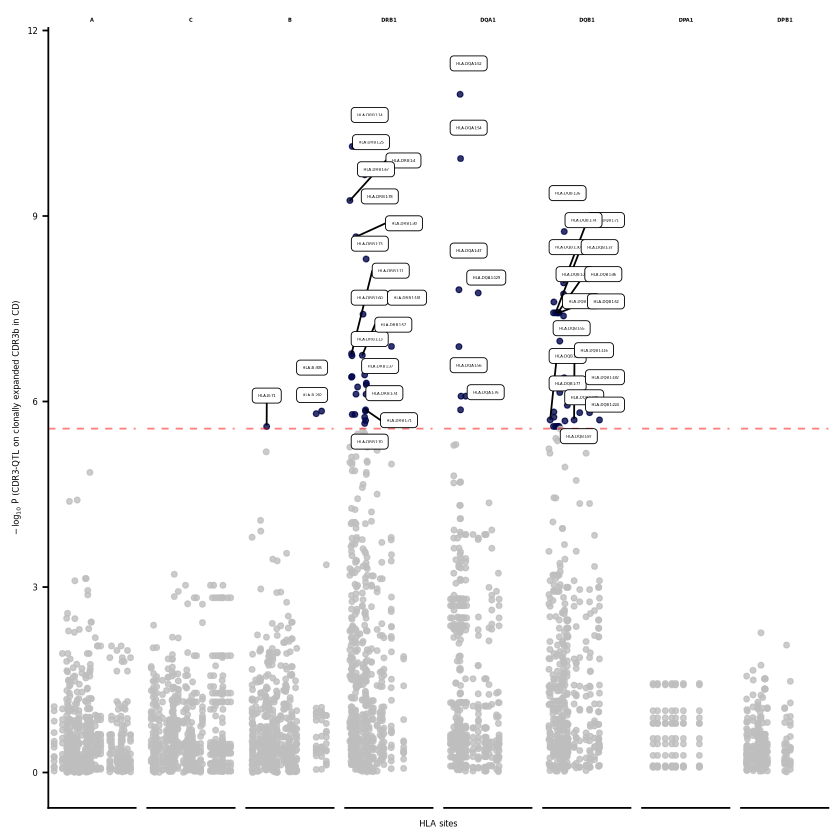

In [ ]:
pl <- ggplot(manova_expanded) +
    geom_point(aes(x = Site_hla, y = -log10(Pvalue), color = ifelse(Pvalue < bonf, 'significant', ' ')), 
        alpha=0.8, size=1.3, show.legend = FALSE) +
    geom_hline(yintercept= - log10(bonf), linetype="dashed", color = "red", alpha = 0.5) +
    ggrepel::geom_label_repel(data = cdr3qtls_expanded, 
        aes(x = Site_hla, y = -log10(Pvalue), label = paste0('HLA-', HLA, ':', Site_hla)), 
        size = 0.8, nudge_y = 0.5, show.legend = FALSE) +
    scale_color_manual(values = c('significant' = group_color[[phenotype]], ' ' = 'grey')) +
    labs(x = "HLA sites", y = expression(paste(-log[10], " ", P, " (CDR3-QTL on top 10% clonally expanded CDR3b in CD)"))) +
    
    theme(legend.position = "none") +
    theme_cowplot() +
    facet_grid(~factor(HLA, levels = hla_genes), space = "free") +
    theme(axis.text.x = element_blank(), 
        axis.text.y = element_text(size = 5),
        axis.title.y = element_text(size = 5),
        axis.title.x = element_text(size = 5),
        #axis.title.x = element_text(vjust = -1, margin = margin(t = 15)),
        strip.background = element_rect(fill = "white"),
        strip.text.x = element_text(size = 3, face = 'bold'),
        axis.ticks.x = element_blank()) 
pl

In [74]:
ggsave(paste0('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/plots/main_manova_expanded_',phenotype,'.pdf'), 
    pl, dpi = 600, width = 10, height = 10,units = 'cm')
ggsave(paste0('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/plots/main_manova_expanded_',phenotype,'.png'), 
    pl, dpi = 600, width = 10, height = 10,units = 'cm')

Warning message:
“ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


In [ ]:
phenotype <- 'both'
manova_expanded <- rbindlist(lapply(
    list.files(paste0('/work_ikmb/sukmb667/projects/cdr3-qtl/healthy_and_ibd/manova_results/only_expanded/',phenotype,'/'),
        full.names = TRUE), 
    fread))
manova_expanded[, group:=phenotype]
bonf <- 0.01 / uniqueN(manova_expanded$pair)
hla_genes <- c('A', 'C', 'B','DRB1','DQA1','DQB1','DPA1', 'DPB1')
manova_expanded <- na.omit(manova_expanded) %>% 
    mutate(Site_hla = as.integer(Site_hla))
cdr3qtls_expanded <- manova_expanded[Pvalue < bonf][, .(HLA, Site_hla, Pvalue)][order(HLA, Site_hla)][, 
    Pvalue := min(Pvalue), by = c("HLA", "Site_hla")] %>% unique()

In [ ]:
pl <- ggplot(manova_expanded) +
    geom_point(aes(x = Site_hla, y = -log10(Pvalue), color = ifelse(Pvalue < bonf, 'significant', ' ')), 
        alpha=0.8, size=1.3, show.legend = FALSE) +
    geom_hline(yintercept= - log10(bonf), linetype="dashed", color = "red", alpha = 0.5) +
    ggrepel::geom_label_repel(data = cdr3qtls_expanded, 
        aes(x = Site_hla, y = -log10(Pvalue), label = paste0('HLA-', HLA, ':', Site_hla)), 
        size = 0.8, nudge_y = 0.5, show.legend = FALSE) +
    scale_color_manual(values = c('significant' = group_color[[phenotype]], ' ' = 'grey')) +
    labs(x = "HLA sites", y = expression(paste(-log[10], " ", P, " (CDR3-QTL on top 10% clonally expanded CDR3b in Combined)"))) +
    
    theme(legend.position = "none") +
    theme_cowplot() +
    facet_grid(~factor(HLA, levels = hla_genes), space = "free") +
    theme(axis.text.x = element_blank(), 
        axis.text.y = element_text(size = 5),
        axis.title.y = element_text(size = 5),
        axis.title.x = element_text(size = 5),
        #axis.title.x = element_text(vjust = -1, margin = margin(t = 15)),
        strip.background = element_rect(fill = "white"),
        strip.text.x = element_text(size = 3, face = 'bold'),
        axis.ticks.x = element_blank()) 
pl